In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.read_csv('G:\project final year/telecom_churn.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

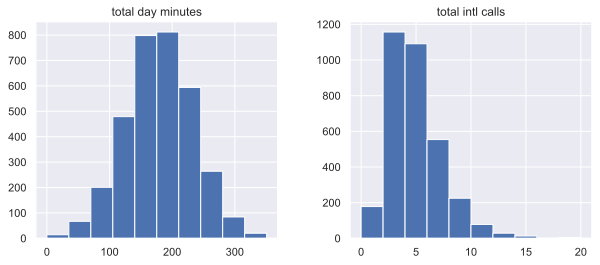

In [6]:
#histogram
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4));

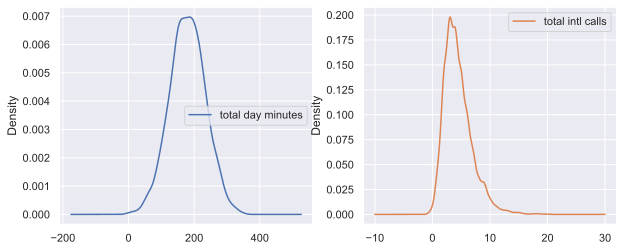

In [7]:
#density plot
df[features].plot(kind='density', subplots=True, layout=(1,2), 
                  sharex=False, figsize=(10,4));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


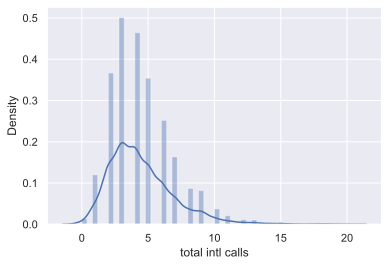

In [8]:
x = df['total intl calls']
sns.distplot(x);

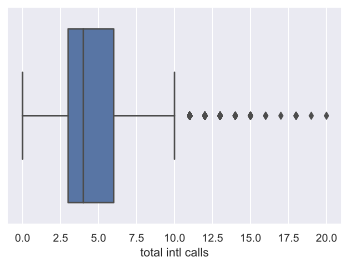

In [9]:
#box plot
sns.boxplot(x = 'total intl calls', data = df);

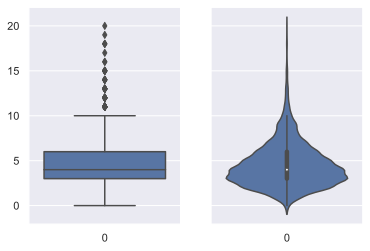

In [10]:
#violin plot
_, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax = axes[1]);

In [11]:
#numerical statistics of the distribution
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [12]:
#frequency table
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

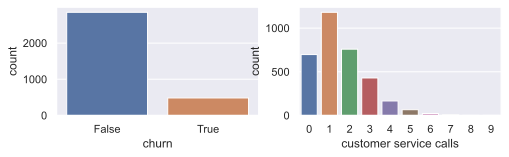

In [13]:
#bar plot
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

sns.countplot(x='churn', data = df, ax = axes[0])
sns.countplot(x='customer service calls', data = df, ax = axes[1]);

In [15]:
#Correlation matrix
numerical = list(set(df.columns)-set(['state', 'international plan', 'voice mail plan',
                                     'area code', 'churn', 'customer service calls']))
corr_matrix = df[numerical].corr()
corr_matrix

,total night charge,total eve charge,total day calls,total eve calls,total day charge,total night minutes,total night calls,total intl charge,account length,total day minutes,total intl calls,total eve minutes,number vmail messages,total intl minutes
total night charge,1.000000,-0.012601,0.022927,-0.002056,0.004301,0.999999,0.011188,-0.015186,-0.008960,0.004300,-0.012329,-0.012593,0.007663,-0.015214
total eve charge,-0.012601,1.000000,-0.021449,-0.011423,0.007036,-0.012592,0.007596,-0.011074,-0.006745,0.007029,0.002541,1.000000,0.017578,-0.011043
total day calls,0.022927,-0.021449,1.000000,0.006462,0.006753,0.022938,-0.019557,0.021666,0.038470,0.006750,0.004574,-0.021451,-0.009548,0.021565
total eve calls,-0.002056,-0.011423,0.006462,1.000000,0.015769,-0.002093,0.007710,0.008674,0.019260,0.015769,0.017434,-0.011430,-0.005864,0.008703
total day charge,0.004301,0.007036,0.006753,0.015769,1.000000,0.004324,0.022972,-0.010094,0.006214,1.000000,0.008032,0.007050,0.000776,-0.010157
total night minutes,0.999999,-0.012592,0.022938,-0.002093,0.004324,1.000000,0.011204,-0.015180,-0.008955,0.004323,-0.012353,-0.012584,0.007681,-0.015207
total night calls,0.011188,0.007596,-0.019557,0.007710,0.022972,0.011204,1.000000,-0.013630,-0.013176,0.022972,0.000305,0.007586,0.007123,-0.013605
total intl charge,-0.015186,-0.011074,0.021666,0.008674,-0.010094,-0.015180,-0.013630,1.000000,0.009546,-0.010092,0.032372,-0.011067,0.002884,0.999993
account length,-0.008960,-0.006745,0.038470,0.019260,0.006214,-0.008955,-0.013176,0.009546,1.000000,0.006216,0.020661,-0.006757,-0.004628,0.009514
total day minutes,0.004300,0.007029,0.006750,0.015769,1.000000,0.004323,0.022972,-0.010092,0.006216,1.000000,0.008033,0.007043,0.000778,-0.010155


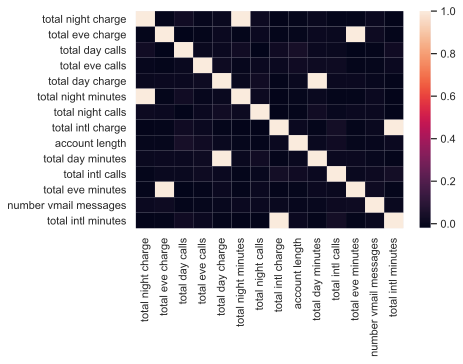

In [17]:
#plotted after correlation matrix
sns.heatmap(corr_matrix);